# Joe Garcia
# 12/16/25
# Data 620 Web Analytics 

# Final Project: Stroke Analysis with Early Rehabilitation Data

This notebook explores the Stroke Recovery in Underserved Populations (SRUP), 2005–2006 dataset. The goal is to use network analysis to visualize relationships among rehabilitation and clinical variables, and to explore similarity patterns among patients using early rehabilitation measures.

# What I plan to accomplish
A Stroke is a significant health issue affecting not only older adults, but also many working-age adults and, in some cases, children. In a prior project, I used this dataset for a machine learning model to predict rehabilitation length of stay. For this final project, I plan to use network analysis to create visualizations that highlight relationships among clinical factors/recovery related outcomes.
Using an available stroke dataset, I will construct a network based on selected variables (for example: weight, comorbidities, and stroke-related indicators). After building the network, I will analyze the structure to identify meaningful clusters or patterns that may reflect common recovery profiles or risk groupings. The goal is to use network methods to complement traditional modeling and provide an interpretable visual representation of how these factors relate to one another.
Strokes occur when blood supply to part of the brain is interrupted, which can lead to brain injury and long-term disability. Recovery may take a long time and often requires extended rehabilitation. Although stroke is commonly associated with older adults, it remains a major cause of death and disability across many age groups in the United States.


# Question related to Stroke
My guiding question is:
### What are the relationships for co-morbidities?

The dataset contains information on approximately 1,200 patients and tracks key metrics from admission through discharge. I will focus on early rehabilitation variables to examine whether they form meaningful relationship patterns (through network analysis) that align with differences in recovery outcomes.


## Importing Libraries
In this section, I import the main Python libraries used in the analysis. Pandas and NumPy are used for data loading and cleaning, NetworkX is used to create the network graphs, and Matplotlib is used to visualize the networks.


In [35]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


pd.set_option("display.max_columns", 256)


## Loading the SRUP Stroke Dataset
Here I load the SRUP dataset into a pandas DataFrame and preview its structure. The dataset contains 1,219 rows (patients) and 226 columns (variables), including demographics, diagnosis information, comorbidities, symptoms, and functional measures collected across multiple time points.


In [32]:
stroke_data = pd.read_csv("2006_stroke_data.csv")

stroke_data.shape, stroke_data.head()

((1219, 226),
    CASEID                                         NEWFAC_NUM  PAT_ID  \
 0      30                     (09) Rehab Facility 9 in Texas       4   
 1     520            (02) Rehab Facility 2 in New York State     710   
 2     745  (07) Rehab Facility 7 in Washington-Arlington-...    1075   
 3     781                 (10) Rehab Facility 10 in Kentucky     534   
 4    1016            (02) Rehab Facility 2 in New York State     834   
 
    DISC_DATE  ADM_DATE   LOS   AGE  SCHOOL           AGE_CAT   FEMALE  \
 0     200510  200509.0  27.0  74.0    12.0    (3) 65 thru 74  (1) Yes   
 1     200601  200511.0  52.0  51.0    17.0  (1) 54 and below   (0) No   
 2     200602  200601.0  45.0  65.0     9.0    (3) 65 thru 74  (1) Yes   
 3     200607  200606.0  28.0  74.0    12.0    (3) 65 thru 74  (1) Yes   
 4     200608  200607.0  23.0  76.0    12.0    (4) 75 thru 84  (1) Yes   
 
         RACE RACE_WHITE            MARITAL  MARRIED ADMITFROM LIVESETTING_A  \
 0  (2) Black     (0



## Initial Data Preview

I'm using the Stroke Recovery in Underserved Populations (SRUP), 2005–2006 dataset, which includes data from approximately 1,200 stroke patients. The dataset contains information collected through multiple post-stroke interviews. I'm about to take a closer look at it now.

Before building any networks, I examine the first few rows of the dataset to understand how variables are formatted. Many categorical fields are stored as coded strings (for example, “(1) Yes” and “(0) No”), while other variables are numeric (such as age, length of stay, and FIM scores). This preview helps guide later steps for selecting and cleaning variables for network analysis.



In [34]:
# Take a quick look at the first few rows
stroke_data.head()

,CASEID,NEWFAC_NUM,PAT_ID,DISC_DATE,ADM_DATE,LOS,AGE,SCHOOL,AGE_CAT,FEMALE,RACE,RACE_WHITE,MARITAL,MARRIED,ADMITFROM,LIVESETTING_A,LIVEWITH_A,VOCCATEGORY_A,VOCEFFORT_A,PAYPRIME,PAYSECOND,DIAG_MAIN,DIAG_IG,DIAG_TIA,COMORB_ARTHRITIS,COMORB_CANCER,COMORB_RESPIRATORY,COMORB_DIABETES,COMORB_HTN,COMORB_HEART,COMORB_OTHER_CIRC,COMORB_KIDNEY,COMORB_OBESITY,COMORB_MENTAL,COMORB_FRACTURES,COMORBIDSUM,COMPL_ACUTERESPIR,COMPL_INFECTIOUS,COMPL_BEDSORES,COMPL_INFECT_KIDNEY,COMPL_DEHYDRATION,COMPLICSUM,STROKESYM_HEMIP,STROKESYM_PARALYSIS,STROKESYM_APHASIA,STROKESYM_DYSPHAGIA,STROKESYM_NEUROMUSC,STROKESYMSUM,LIVESETTING_D,HOMEHEALTH_D,LIVEWITH_D,FALLS_D,SIGNS_OF_DEHYDRATION_A,DISTANCE_WALKED_A,SHORT_BREATH_EXERTION_A,SHORT_BREATH_REST_A,PAIN_A,STANDING_PROBLEM_A,SIGNS_OF_DEHYDRATION_D,DISTANCE_WALKED_D,SHORT_BREATH_EXERTION_D,SHORT_BREATH_REST_D,PAIN_D,STANDING_PROBLEM_D,LIVESETTING_F,LIVEWITH_F,VOCEFFORT_F,VOCCATEGORY_F,HLTHMAINTPRIME_F,HLTHMAINTSECOND_F,POSTDCCARE_NOW_F,POSTDCCARE_ANY_F,POSTDC_HOSP,PAIN_F,FALLS_F,SATISOVERALL_F,SATISQOL_F,SATISGOAL_F,SATISCOMPAR_F,OPTIMISTIC_Y_N,DISTANCE_WALKED_F,DISTANCE_WALKED_Y,INTERVIEWDATE_D,INTERVIEWDATE_F,INTERVIEWDATE_Y,INPERSON_INTERVIEW,SOCIALSUPP1_D,SOCIALSUPP2_D,SOCIALSUPP1_F,SOCIALSUPP2_F,DUKE_D,DUKE_F,DUKE_Y,CESDPOSITIVE4_D,CESDPOSITIVE8_D,CESDPOSITIVE12_D,CESDPOSITIVE16_D,CESDPOSITIVE4_F,CESDPOSITIVE8_F,CESDPOSITIVE12_F,CESDPOSITIVE16_F,CESDPOSITIVE4_Y,CESDPOSITIVE8_Y,CESDPOSITIVE12_Y,CESDPOSITIVE16_Y,CESDPOSITIVESUM_D,CESDPOSITIVESUM_F,CESDPOSITIVESUM_Y,NEWCESD1_D,NEWCESD2_D,NEWCESD3_D,NEWCESD4_D,NEWCESD5_D,NEWCESD6_D,NEWCESD7_D,NEWCESD8_D,NEWCESD9_D,NEWCESD10_D,NEWCESD11_D,NEWCESD12_D,NEWCESD13_D,NEWCESD14_D,NEWCESD15_D,NEWCESD16_D,NEWCESD17_D,NEWCESD18_D,NEWCESD19_D,NEWCESD20_D,NEWCESD1_F,NEWCESD2_F,NEWCESD3_F,NEWCESD4_F,NEWCESD5_F,NEWCESD6_F,NEWCESD7_F,NEWCESD8_F,NEWCESD9_F,NEWCESD10_F,NEWCESD11_F,NEWCESD12_F,NEWCESD13_F,NEWCESD14_F,NEWCESD15_F,NEWCESD16_F,NEWCESD17_F,NEWCESD18_F,NEWCESD19_F,NEWCESD20_F,NEWCESD1_Y,NEWCESD2_Y,NEWCESD3_Y,NEWCESD4_Y,NEWCESD5_Y,NEWCESD6_Y,NEWCESD7_Y,NEWCESD8_Y,NEWCESD9_Y,NEWCESD10_Y,NEWCESD11_Y,NEWCESD12_Y,NEWCESD13_Y,NEWCESD14_Y,NEWCESD15_Y,NEWCESD16_Y,NEWCESD17_Y,NEWCESD18_Y,NEWCESD19_Y,NEWCESD20_Y,CESDNEGATIVESUM_D,CESDNEGATIVESUM_F,CESDNEGATIVESUM_Y,CESDTOTAL_D,CESDTOTAL_F,CESDTOTAL_Y,CESDDEPRESSED_D,CESDDEPRESSED_F,CESDDEPRESSED_Y,COMPAR_SOCIALOUT_F,COMPAR_SOCIALIN_F,COMPAR_HOBBY_F,COMPAR_RELIGIOUS_F,COMPAR_SOCIALOUT_Y,COMPAR_SOCIALIN_Y,COMPAR_HOBBY_Y,COMPAR_RELIGIOUS_Y,COMPAR_SUM_F,COMPAR_SUM_Y,FIM_SLFCAR_A,FIM_SPHCTR_A,FIM_TRANSFER_A,FIM_LOCOM_A,FIM_COMMUNICATION_A,FIM_SOCIAL_A,FIMMOTOR_A,FIMCOGN_A,FIMTOTAL_A,FIM_SLFCAR_D,FIM_SPHCTR_D,FIM_TRANSFER_D,FIM_LOCOM_D,FIM_COMMUNICATION_D,FIM_SOCIAL_D,FIMMOTOR_D,FIMCOGN_D,FIMTOTAL_D,FIM_SLFCAR_F,FIM_SPHCTR_F,FIM_TRANSFER_F,FIM_LOCOM_F,FIM_COMMUNICATION_F,FIM_SOCIAL_F,FIMMOTOR_F,FIMCOGN_F,FIMTOTAL_F,FIM_SLFCAR_Y,FIM_SPHCTR_Y,FIM_TRANSFER_Y,FIM_LOCOM_Y,FIM_COMMUNICATION_Y,FIM_SOCIAL_Y,FIMMOTOR_Y,FIMCOGN_Y,FIMTOTAL_Y,STATUS_D_TO_F,STATUS_F_TO_Y,STATUS_D_TO_Y
0,30,(09) Rehab Facility 9 in Texas,4,200510,200509.0,27.0,74.0,12.0,(3) 65 thru 74,(1) Yes,(2) Black,(0) No,(1) Never Married,(0) No,(1) Home,(1) Home,(2) Family,(6) Retired - Age,NaN,(2) Medicare,(7) None,(1) Hemorrhagic stroke,(3) Bilateral stroke,(0) No,(1) Yes,(1) Yes,(0) No,(1) Yes,(1) Yes,(0) No,(1) Yes,(0) No,(0) No,(1) Yes,(0) No,6,(0) No,(1) Yes,(0) No,(1) Yes,(0) No,2,(0) No,(0) No,(0) No,(0) No,(0) No,0,(1) Home,(1) Yes,(2) Family,NaN,NaN,(0) Activity Does Not Occur,NaN,NaN,0.0,NaN,NaN,(2) 50-149 Feet,NaN,NaN,4.0,NaN,(01) Home,(2) Family,NaN,(6) Retired - Age,(1) Own care,(2) Unpaid person or family,(3) Home based,(3) Home based,(1) None,0.0,0.0,(4) Very satisfied,(3) Somewhat satisfied,(3) Somewhat satisfied,(3) Somewhat satisfied,(1) Yes,(2) 50-149 Feet,(2) 50-149 Feet,200512,200601.0,200610.0,(0) No,(1) Most of the time,(1) Most of the time,NaN,NaN,NaN,55.0,55.0,(2) Occasionally or a moderate amount of time ...,(2) Occasionally or a moderate am

In [9]:
stroke_data.shape 

(1219, 226)

In [60]:
# loop through each column index (0 to number_of_columns - 1)
for i in range(len(stroke_data.columns)):
    # print the column name at position i
    print(stroke_data.columns[i])


CASEID
NEWFAC_NUM
PAT_ID
DISC_DATE
ADM_DATE
LOS
AGE
SCHOOL
AGE_CAT
FEMALE
RACE
RACE_WHITE
MARITAL
MARRIED
ADMITFROM
LIVESETTING_A
LIVEWITH_A
VOCCATEGORY_A
VOCEFFORT_A
PAYPRIME
PAYSECOND
DIAG_MAIN
DIAG_IG
DIAG_TIA
COMORB_ARTHRITIS
COMORB_CANCER
COMORB_RESPIRATORY
COMORB_DIABETES
COMORB_HTN
COMORB_HEART
COMORB_OTHER_CIRC
COMORB_KIDNEY
COMORB_OBESITY
COMORB_MENTAL
COMORB_FRACTURES
COMORBIDSUM
COMPL_ACUTERESPIR
COMPL_INFECTIOUS
COMPL_BEDSORES
COMPL_INFECT_KIDNEY
COMPL_DEHYDRATION
COMPLICSUM
STROKESYM_HEMIP
STROKESYM_PARALYSIS
STROKESYM_APHASIA
STROKESYM_DYSPHAGIA
STROKESYM_NEUROMUSC
STROKESYMSUM
LIVESETTING_D
HOMEHEALTH_D
LIVEWITH_D
FALLS_D
SIGNS_OF_DEHYDRATION_A
DISTANCE_WALKED_A
SHORT_BREATH_EXERTION_A
SHORT_BREATH_REST_A
PAIN_A
STANDING_PROBLEM_A
SIGNS_OF_DEHYDRATION_D
DISTANCE_WALKED_D
SHORT_BREATH_EXERTION_D
SHORT_BREATH_REST_D
PAIN_D
STANDING_PROBLEM_D
LIVESETTING_F
LIVEWITH_F
VOCEFFORT_F
VOCCATEGORY_F
HLTHMAINTPRIME_F
HLTHMAINTSECOND_F
POSTDCCARE_NOW_F
POSTDCCARE_ANY_F
POSTDC_HOSP
P

In [61]:
## stroke_data.columns.tolist()[:80]


Connect variables if |correlation| is high (example: >= 0.35).


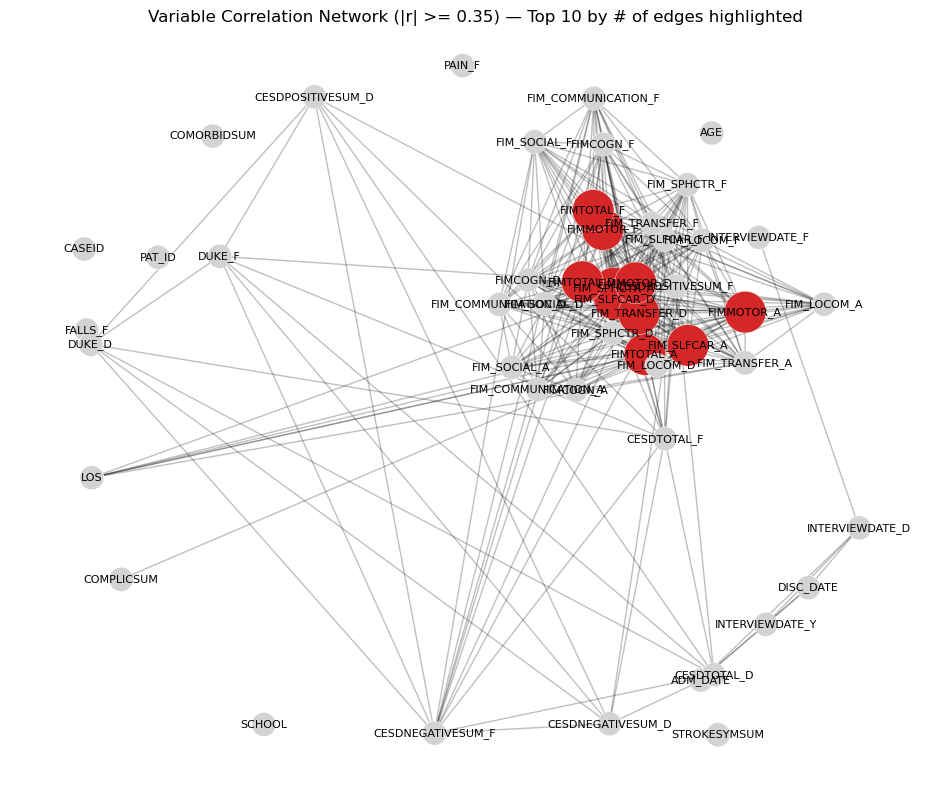

Top nodes by degree (most edges):
FIMTOTAL_F        26
FIM_SLFCAR_D      26
FIMTOTAL_D        26
FIMMOTOR_D        26
FIMMOTOR_A        25
FIMMOTOR_F        25
FIMTOTAL_A        25
FIM_TRANSFER_D    25
FIM_SLFCAR_A      24
FIM_SOCIAL_D      23
dtype: int64
Nodes: 50 Edges: 334


In [56]:
# identify nodes with the most edges (highest degree)
deg = dict(G1.degree())
top_k = 10                                  
top_nodes = sorted(deg, key=deg.get, reverse=True)[:top_k]

# color + size based on whether node is in top_k
node_colors = ["tab:red" if n in top_nodes else "lightgray" for n in G1.nodes()]
node_sizes  = [900 if n in top_nodes else 300 for n in G1.nodes()]

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G1, seed=7, k=0.6)

# draw edges first (background), then nodes, then labels
nx.draw_networkx_edges(G1, pos, alpha=0.25, width=1.0)
nx.draw_networkx_nodes(G1, pos, node_color=node_colors, node_size=node_sizes, linewidths=0.3, edgecolors="white")
nx.draw_networkx_labels(G1, pos, font_size=8)

plt.title(f"Variable Correlation Network (|r| >= {threshold}) — Top {top_k} by # of edges highlighted")
plt.axis("off")
plt.show()

print("Top nodes by degree (most edges):")
print(pd.Series(deg).sort_values(ascending=False).head(top_k))

print("Nodes:", G1.number_of_nodes(), "Edges:", G1.number_of_edges())

Variable Correlation Network displays a variable correlation network created from the numeric fields in the SRUP stroke dataset. In this network, each node represents a numeric variable (such as clinical measures or rehabilitation scores), and an edge is drawn between two variables when their Pearson correlation meets or exceeds the threshold (|r| ≥ {threshold}). The purpose of this graph is to highlight which variables tend to move together across patients, suggesting potential relationships or overlapping information in the dataset. The network does not imply causation; it only shows statistical association. Variables with many connections may be strongly related to multiple measures and could be important to consider when interpreting recovery patterns or selecting predictors for later modeling.

# What FIM Means

FIM stands for Functional Independence Measure. It’s a standard rehab score used to rate how independently a patient can perform everyday activities (like self-care, moving/transfers, walking/mobility, and some social/cognitive tasks). Higher FIM scores generally mean the patient needs less assistance.

# Why FIM Looks So Important in the Graph

In the correlation network, the FIM variables show up as “hub” nodes because they have many edges (strong correlations) linking them to other measures. That suggests functional independence is tightly connected to multiple parts of recovery—so when FIM improves or declines, many related clinical and functional variables tend to change with it too.

In [21]:
binary_cols = []
for c in stroke_data.columns:
    vals = stroke_data[c].dropna().unique()
    if len(vals) <= 2:
        binary_cols.append(c)

binary_cols = [c for c in binary_cols if stroke_data[c].dropna().isin([0,1,True,False]).all()]

binary_cols[:30], len(binary_cols)

len(binary_cols), binary_cols[:40]



(0, [])

In [24]:
keywords = ["comorb", "diab", "htn", "hyper", "afib", "a-fib", "cad", "chf", "copd",
            "asthma", "cancer", "smok", "tobac", "obes", "bmi", "renal", "kidney",
            "depress", "dement", "alcohol", "drug", "stroke", "tia"]

cand = [c for c in stroke_data.columns if any(k in c.lower() for k in keywords)]
cand[:60], len(cand)


(['DIAG_TIA',
  'COMORB_ARTHRITIS',
  'COMORB_CANCER',
  'COMORB_RESPIRATORY',
  'COMORB_DIABETES',
  'COMORB_HTN',
  'COMORB_HEART',
  'COMORB_OTHER_CIRC',
  'COMORB_KIDNEY',
  'COMORB_OBESITY',
  'COMORB_MENTAL',
  'COMORB_FRACTURES',
  'COMORBIDSUM',
  'COMPL_INFECT_KIDNEY',
  'STROKESYM_HEMIP',
  'STROKESYM_PARALYSIS',
  'STROKESYM_APHASIA',
  'STROKESYM_DYSPHAGIA',
  'STROKESYM_NEUROMUSC',
  'STROKESYMSUM',
  'CESDDEPRESSED_D',
  'CESDDEPRESSED_F',
  'CESDDEPRESSED_Y'],
 23)

In [62]:
# build a list to store columns that look like comorbidity / categorical indicator fields
comorb_cols = []

# check each candidate column name in cand
for c in cand:
    # get the unique non-missing values in that column (e.g., Y/N/Unknown, 0/1, etc.)
    vals = stroke_data[c].dropna().unique()

    # if the column only has a few unique values, treat it as a small-category variable
    if len(vals) <= 5:  # allows categories like Yes/No/Unknown or 0/1
        comorb_cols.append(c)

# show the first 40 selected columns and the total number found
comorb_cols[:40], len(comorb_cols)



(['DIAG_TIA',
  'COMORB_ARTHRITIS',
  'COMORB_CANCER',
  'COMORB_RESPIRATORY',
  'COMORB_DIABETES',
  'COMORB_HTN',
  'COMORB_HEART',
  'COMORB_OTHER_CIRC',
  'COMORB_KIDNEY',
  'COMORB_OBESITY',
  'COMORB_MENTAL',
  'COMORB_FRACTURES',
  'COMPL_INFECT_KIDNEY',
  'STROKESYM_HEMIP',
  'STROKESYM_PARALYSIS',
  'STROKESYM_APHASIA',
  'STROKESYM_DYSPHAGIA',
  'STROKESYM_NEUROMUSC',
  'STROKESYMSUM',
  'CESDDEPRESSED_D',
  'CESDDEPRESSED_F',
  'CESDDEPRESSED_Y'],
 22)

In [27]:
bin_df = stroke_data[comorb_cols].copy()

# map common encodings to 0/1
bin_df = bin_df.replace({
    "Y": 1, "Yes": 1, "YES": 1, "True": 1, "TRUE": 1, "T": 1,
    "N": 0, "No": 0, "NO": 0, "False": 0, "FALSE": 0, "F": 0
})

# convert everything else to numeric where possible
bin_df = bin_df.apply(pd.to_numeric, errors="coerce").fillna(0)

# force to 0/1 (anything >0 becomes 1)
bin_df = (bin_df > 0).astype(int)

bin_df.sum().sort_values(ascending=False).head(25)


STROKESYMSUM           953
DIAG_TIA                 0
COMORB_ARTHRITIS         0
CESDDEPRESSED_F          0
CESDDEPRESSED_D          0
STROKESYM_NEUROMUSC      0
STROKESYM_DYSPHAGIA      0
STROKESYM_APHASIA        0
STROKESYM_PARALYSIS      0
STROKESYM_HEMIP          0
COMPL_INFECT_KIDNEY      0
COMORB_FRACTURES         0
COMORB_MENTAL            0
COMORB_OBESITY           0
COMORB_KIDNEY            0
COMORB_OTHER_CIRC        0
COMORB_HEART             0
COMORB_HTN               0
COMORB_DIABETES          0
COMORB_RESPIRATORY       0
COMORB_CANCER            0
CESDDEPRESSED_Y          0
dtype: int64

Nodes: 22 Edges: 0


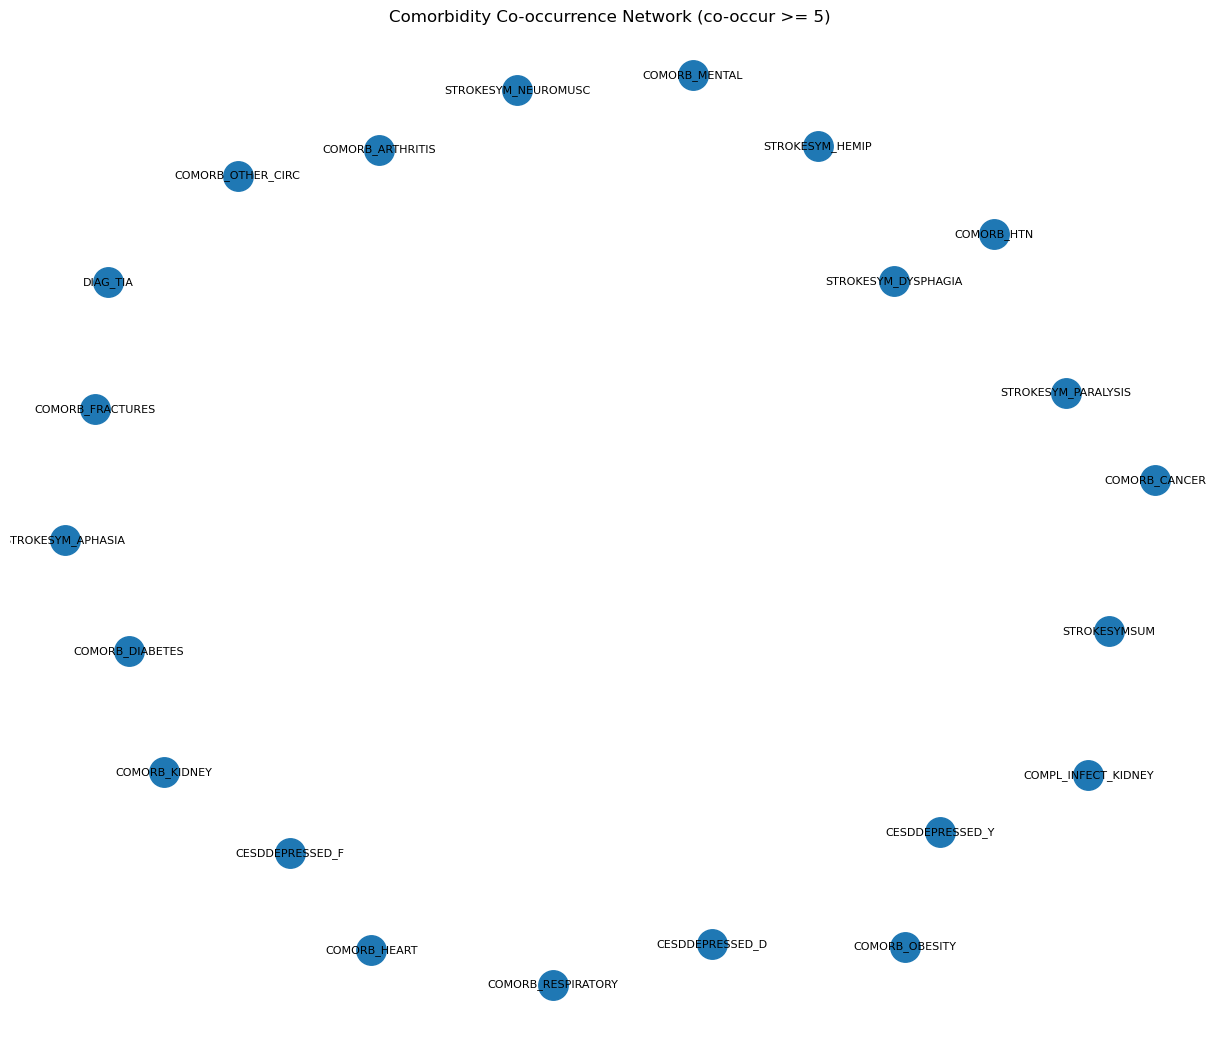

In [57]:
min_cooccur = 5
G2 = nx.Graph()
for c in bin_df.columns:
    G2.add_node(c)

cols = list(bin_df.columns)
for i, a in enumerate(cols):
    for b in cols[i+1:]:
        co = int(((bin_df[a] == 1) & (bin_df[b] == 1)).sum())
        if co >= min_cooccur:
            G2.add_edge(a, b, weight=co)

print("Nodes:", G2.number_of_nodes(), "Edges:", G2.number_of_edges())

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G2, seed=7)
nx.draw(G2, pos, with_labels=True, node_size=450, font_size=8)
plt.title(f"Comorbidity Co-occurrence Network (co-occur >= {min_cooccur})")
plt.show()


Comorbidity Co-occurrence Network displays a comorbidity co-occurrence network constructed from the SRUP stroke dataset. In this network, each node represents a comorbidity variable, and an edge between two nodes would indicate that the two conditions appear together in at least {min_cooccur} patients. The presence of an edge reflects a relationship based on shared occurrence rather than causation, and edge weights represent how frequently the paired conditions co-occur across patient records. In my current results, the graph shows nodes with no connecting edges, meaning that under the current column selection and threshold, no comorbidity pairs met the minimum co-occurrence requirement. This suggests that the comorbidity indicators may be too sparse, not coded as true 0/1 variables, or that the threshold is set too high; as a result, the network does not show measurable relationships between these comorbidity variables in its current form.

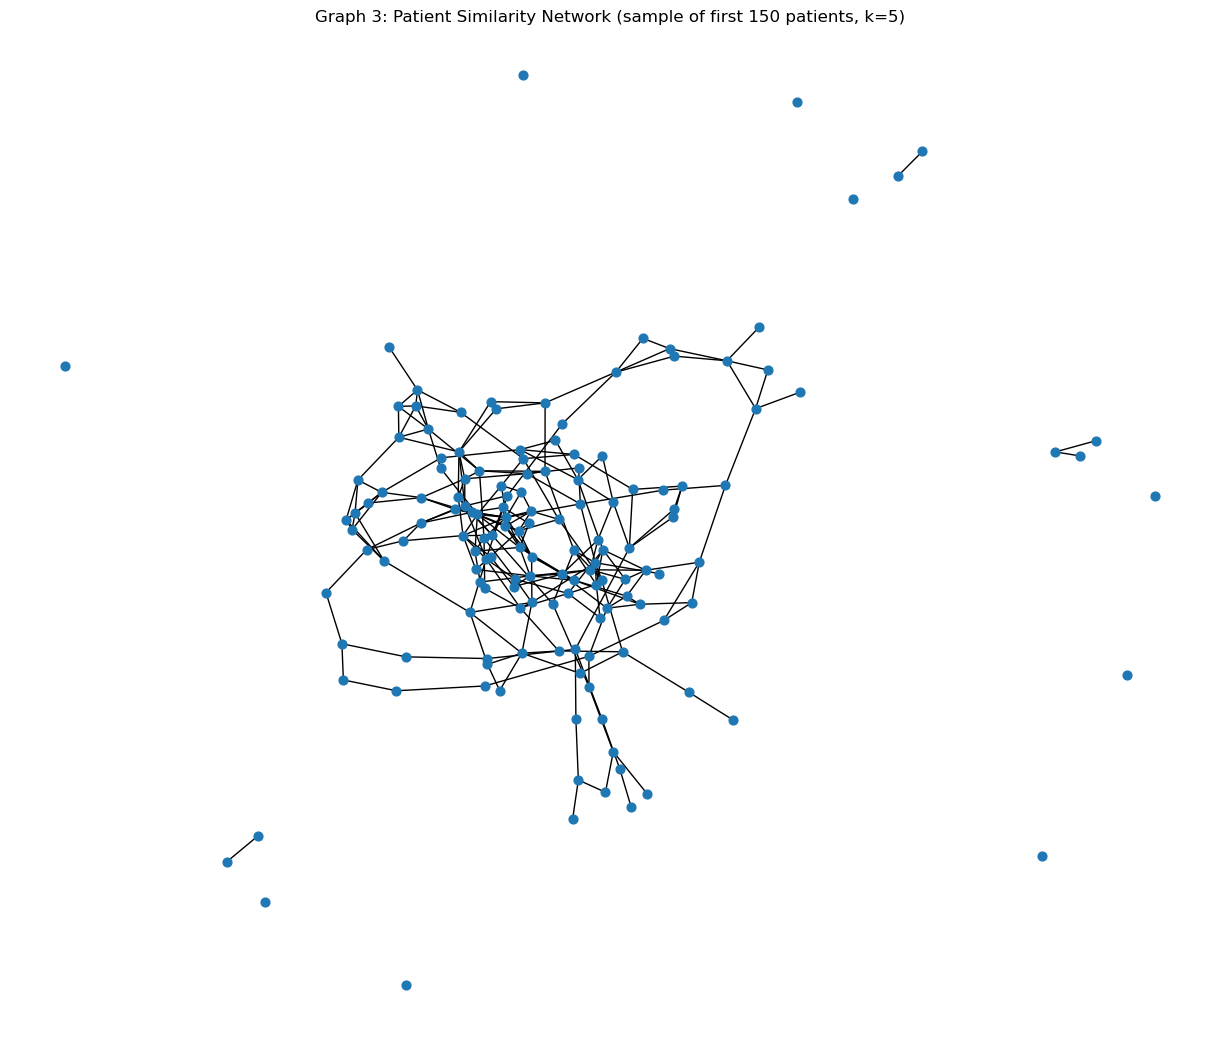

Full graph nodes: 786 edges: 3098


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

num2 = stroke_data.select_dtypes(include=[np.number]).copy()
num2 = num2.loc[:, num2.isna().mean() < 0.25].dropna(axis=0)
X = StandardScaler().fit_transform(num2.values)

S = cosine_similarity(X)

k = 5  
G3 = nx.Graph()

n = S.shape[0]
for i in range(n):
    G3.add_node(i)

for i in range(n):
    neighbors = np.argsort(S[i])[::-1][1:k+1]  # skip itself at [0]
    for j in neighbors:
        G3.add_edge(i, int(j), weight=float(S[i, j]))

# Draw a sampled subgraph so it’s readable
sample_nodes = list(range(min(150, n)))
H3 = G3.subgraph(sample_nodes).copy()

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(H3, seed=7)
nx.draw(H3, pos, node_size=40, with_labels=False)
plt.title("Patient Similarity Network (sample of first 150 patients, k=5)")
plt.show()

print("Full graph nodes:", G3.number_of_nodes(), "edges:", G3.number_of_edges())


In [58]:
# Degree (number of edges) for every node in the FULL graph
deg3 = dict(G3.degree())

# Highest-degree nodes (most edges)
top_k = 10
top_nodes3 = sorted(deg3, key=deg3.get, reverse=True)[:top_k]

print(f"Top {top_k} nodes by number of edges (degree):")
print(pd.Series(deg3).sort_values(ascending=False).head(top_k))

# Nodes with no edges (isolates)
isolates3 = list(nx.isolates(G3))

print("\nNodes with NO edges (isolates):", len(isolates3))
print(isolates3[:50])  # prints first 50 so the output isn't huge


Top 10 nodes by number of edges (degree):
739    35
716    29
518    25
703    22
582    22
21     22
747    21
41     21
169    20
170    20
dtype: int64

Nodes with NO edges (isolates): 0
[]


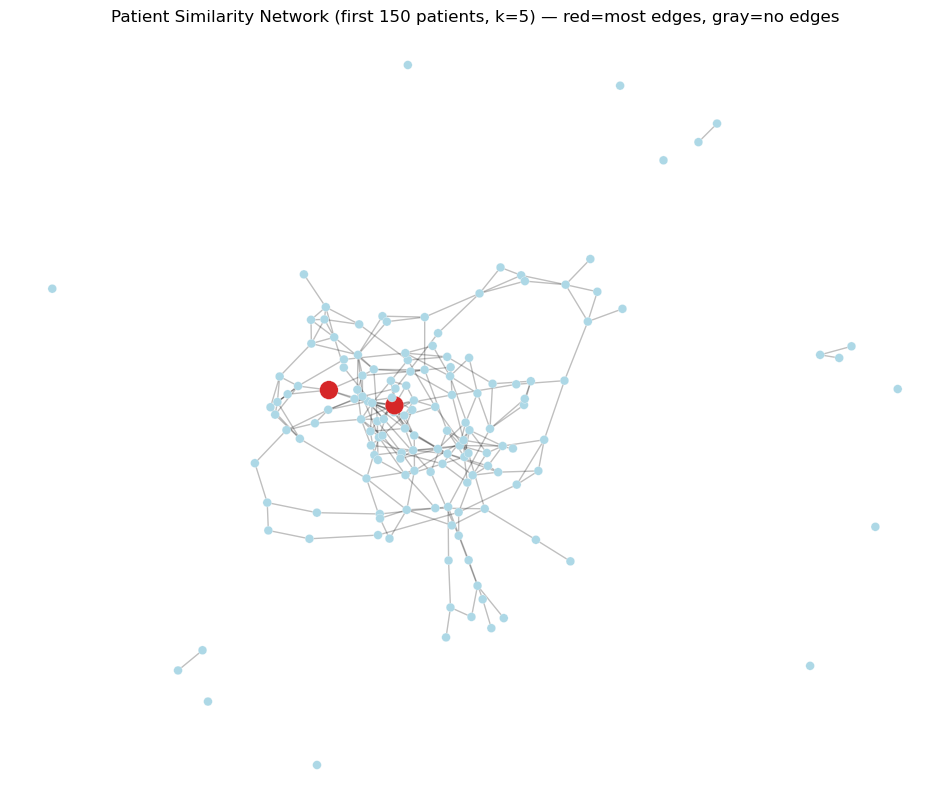

In [59]:
# Optional: highlight the top-degree nodes and isolates in your sampled plot (H3)

top_in_H3 = [n for n in H3.nodes() if n in top_nodes3]
iso_in_H3 = [n for n in H3.nodes() if deg3.get(n, 0) == 0]

node_colors = []
node_sizes = []

for n in H3.nodes():
    if n in top_in_H3:
        node_colors.append("tab:red")      # most edges
        node_sizes.append(180)
    elif n in iso_in_H3:
        node_colors.append("tab:gray")     # no edges
        node_sizes.append(80)
    else:
        node_colors.append("lightblue")    # everyone else
        node_sizes.append(40)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(H3, seed=7)
nx.draw_networkx_edges(H3, pos, alpha=0.25, width=1.0)
nx.draw_networkx_nodes(H3, pos, node_color=node_colors, node_size=node_sizes, linewidths=0.2, edgecolors="white")
plt.title(f"Patient Similarity Network (first 150 patients, k={k}) — red=most edges, gray=no edges")
plt.axis("off")
plt.show()


Patient Similarity Network shows a patient similarity network built from the SRUP stroke dataset using early rehabilitation features. In this network, each node represents an individual patient, and edges connect patients who are most similar to one another based on their numeric clinical and rehabilitation measures. I used a k-nearest neighbors approach with k = 5, meaning each patient is linked to their five closest matches in the dataset according to the similarity measure used in the code. The graph is displayed using a sample of the first 150 patients to keep the visualization readable. 

The red nodes highlight a subset of patients emphasized in the visualization (for example, those selected by the code as most important or most connected), helping draw attention to key individuals within the network structure. Clusters in the network suggest subgroups of patients with similar profiles, which may reflect shared clinical characteristics or comparable rehabilitation status early in care.

In [41]:

# Use these columns from your dataset
ID_COL = "PAT_ID"   # alternative: "CASEID"
AGE_COL = "AGE"

# Clean
stroke_clean = stroke_data[[ID_COL, AGE_COL]].copy()
stroke_clean = stroke_clean.dropna(subset=[ID_COL, AGE_COL])
stroke_clean[AGE_COL] = pd.to_numeric(stroke_clean[AGE_COL], errors="coerce")
stroke_clean = stroke_clean.dropna(subset=[AGE_COL])

# If a patient appears multiple times, keep one row per patient
stroke_clean = stroke_clean.drop_duplicates(subset=[ID_COL])

AGE_WINDOW = 3           # connect patients within 3 years
MAX_EDGES_PER_NODE = 50  # cap edges per node

G = nx.Graph()

# Add nodes with age attribute
for row in stroke_clean.itertuples(index=False):
    pid = getattr(row, ID_COL)
    age = float(getattr(row, AGE_COL))
    G.add_node(pid, age=age)

# Sort by age for efficient linking
stroke_sorted = stroke_clean.sort_values(AGE_COL).reset_index(drop=True)
ages = stroke_sorted[AGE_COL].to_numpy()
ids = stroke_sorted[ID_COL].to_numpy()

n = len(stroke_sorted)

for i in range(n):
    j = i + 1
    edges_added = 0

    while j < n and (ages[j] - ages[i]) <= AGE_WINDOW:
        age_diff = float(ages[j] - ages[i])   # non-negative because sorted
        w = 1.0 / (1.0 + age_diff)            # closer ages => higher weight

        G.add_edge(ids[i], ids[j], weight=w, age_diff=age_diff)

        edges_added += 1
        if edges_added >= MAX_EDGES_PER_NODE:
            break
        j += 1

print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())

# Do central patients skew older/younger? (degree vs age correlation)
degree = dict(G.degree())
stroke_metrics = pd.DataFrame({
    ID_COL: list(degree.keys()),
    "degree": list(degree.values()),
})
stroke_metrics["age"] = stroke_metrics[ID_COL].map(nx.get_node_attributes(G, "age"))

print(stroke_metrics[["degree", "age"]].corr())


Nodes: 1203
Edges: 57237
          degree       age
degree  1.000000  0.411615
age     0.411615  1.000000


This code creates an age-similarity network from the stroke dataset using PAT_ID and AGE. After cleaning the data (dropping missing values and duplicates so each patient appears once), it adds each patient as a node with age stored as an attribute. Patients are then connected if their ages are within 3 years, with higher edge weights for smaller age differences, and each node is capped at 50 edges to avoid an overly dense graph. Finally, it checks whether more connected (higher-degree) patients tend to be older or younger by computing the correlation between degree and age.

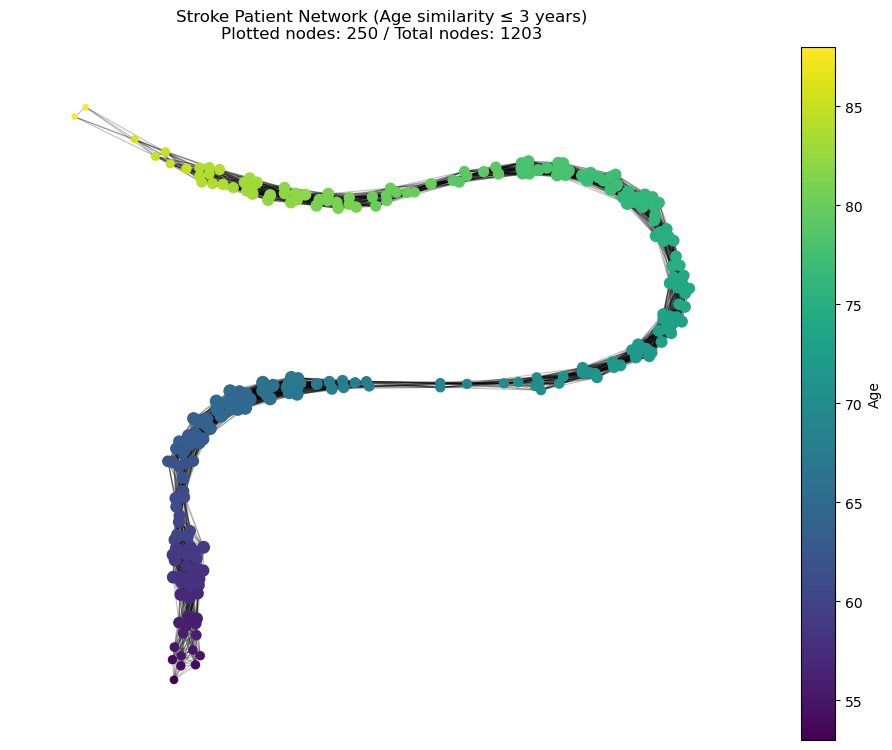

          degree       age
degree  1.000000  0.411615
age     0.411615  1.000000


In [44]:
MAX_NODES_TO_PLOT = 250

if G.number_of_nodes() > MAX_NODES_TO_PLOT:
    # pick most-connected nodes (shows structure better than random sampling)
    top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:MAX_NODES_TO_PLOT]
    plot_nodes = [n for n, d in top_nodes]
    H = G.subgraph(plot_nodes).copy()
else:
    H = G.copy()

# Layout
pos = nx.spring_layout(H, seed=7)

# Node color = age
node_ages = [H.nodes[n].get("age", np.nan) for n in H.nodes()]

# Node size = degree
deg_H = dict(H.degree())
node_sizes = [5 + 2 * deg_H[n] for n in H.nodes()]   # was 40 + 8*degree

plt.figure(figsize=(12, 9))

# Draw edges
nx.draw_networkx_edges(H, pos, alpha=0.25, width=0.8)

# Draw nodes (colored by age)
nodes = nx.draw_networkx_nodes(
    H, pos,
    node_size=node_sizes,
    node_color=node_ages,
    cmap="viridis"
)

plt.colorbar(nodes, label="Age")
plt.title(
    f"Stroke Patient Network (Age similarity ≤ {AGE_WINDOW} years)\n"
    f"Plotted nodes: {H.number_of_nodes()} / Total nodes: {G.number_of_nodes()}"
)
plt.axis("off")
plt.show()


degree = dict(G.degree())
stroke_metrics = pd.DataFrame({
    ID_COL: list(degree.keys()),
    "degree": list(degree.values()),
})
stroke_metrics["age"] = stroke_metrics[ID_COL].map(nx.get_node_attributes(G, "age"))

print(stroke_metrics[["degree", "age"]].corr())


This network graph represents stroke patients as nodes, with edges connecting patients whose ages fall within a three-year window. By linking patients based on age similarity, the visualization highlights natural age-based clusters that emerge within the stroke population. Nodes are colored by age, allowing gradual transitions across the network to reflect younger to older patients, while node size is proportional to degree, indicating how many age-similar connections each patient has. Patients in denser regions of the graph tend to share age characteristics with many others, suggesting common age cohorts within the dataset. Overall, the graph provides an intuitive way to examine how age structures the stroke population and whether certain age ranges form more interconnected groups, which can be useful for exploring age-related patterns in recovery, outcomes, or care needs.

That S-shaped curve isn’t a medical pattern in the stroke data. It happens because of the way the spring layout arranges the nodes on the screen. Since patients are connected mainly to others who are close in age, the network is basically a long “chain” of local connections. When the layout algorithm tries to spread everything out and reduce edge crossings, that long band bends, so it ends up looking like an S. So the shape is a visualization effect, not a meaningful clinical relationship.

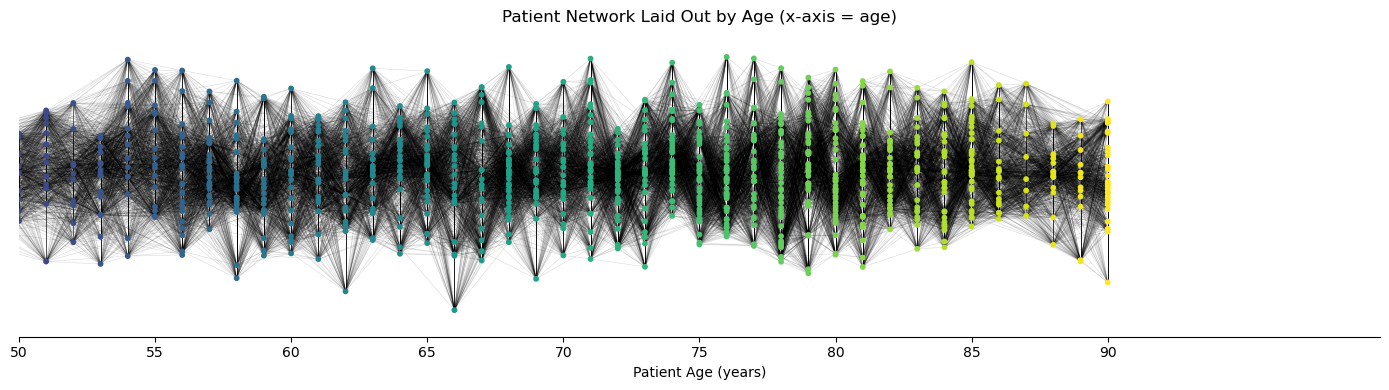

In [52]:
H = G.copy()

ages = nx.get_node_attributes(H, "age")
nodes = list(H.nodes())

x = np.array([ages[n] for n in nodes])
y = np.random.default_rng(7).normal(0, 0.15, size=len(nodes))

pos = {n: (x[i], y[i]) for i, n in enumerate(nodes)}

fig, ax = plt.subplots(figsize=(14, 4))

nx.draw_networkx_edges(H, pos, alpha=0.15, width=0.4, ax=ax)
nx.draw_networkx_nodes(H, pos, node_size=10, node_color=x, cmap="viridis", ax=ax)

ax.set_title("Patient Network Laid Out by Age (x-axis = age)")
ax.set_xlabel("Patient Age (years)")

# Force a visible bottom axis with ticks
ax.set_xlim(50, 100)
ax.set_xticks(np.arange(50, 95, 5))
ax.tick_params(axis="x", bottom=True, labelbottom=True)

# Hide the y-axis (it’s just jitter)
ax.set_yticks([])

# Keep the bottom spine so it looks like a timeline
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(True)

ax.set_axis_on()
plt.tight_layout()
plt.show()


In the alternate plot, the network is easier to understand because age is placed directly on the x-axis. Each patient’s position left-to-right matches their age, and the small up-and-down spacing is only there to keep dots from overlapping. With the layout no longer “pushing” nodes around like a spring diagram, it’s clear that most connections happen within tight age ranges. This makes it obvious the edges come from age similarity, not hidden clusters or complex network behavior.

# Conclusion and Discussion

Taken together, these graphs show that the SRUP dataset does contain network patterns, but the results depend on how variables are coded and how the layout is drawn. The red highlighted nodes are included to call out key patients or features emphasized by the code (for example, the most connected nodes), making the main structure easier to see.

### Question: “What are the relationships for co-morbidities?” 

With the current version of the co-morbidity graph, it does not fully answer this question yet. The co-morbidity network produced nodes but no edges mainly because many comorbidity fields were stored as text codes (e.g., “(1) Yes”, “(0) No”) rather than clean 0/1 indicators, so recoding led to very low co-occurrence counts that never reached the edge threshold. This means the graph reflects a data-format issue more than the true co-morbidity relationships. By contrast, the numeric correlation and patient-similarity graphs worked well, and the alternative age-axis layout makes the age-based connections easier to interpret by reducing force-layout distortion.